# Ejercicios práctica 3
#### Alejandro Rubio Martínez

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from time import perf_counter as now
import numpy as np

**1. Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional**

Vamos a empezar por modificar los ficheros

In [2]:
%%file eulerexplicito.py

import numpy as np
def integrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + h*F(X[n],Y[n]))
    return np.array(X),np.array(Y)

Overwriting eulerexplicito.py


In [3]:
%%file eulerimplicito.py

import numpy as np
import sympy as sp
def integrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    y1 = sp.Symbol('y1')
    for n in range(N):
        Y.append(sp.solve(Y[n]+h*F(X[n+1],y1)-y1,y1)[0])
    return np.array(X),np.array(Y)

Overwriting eulerimplicito.py


In [4]:
%%file eulerimplicitoaprox.py

import numpy as np
import sympy as sp

def integrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    for n in range(N):   
        y1 = Y[n] + h*F(X[n],Y[n])
        Y.append(Y[n]+h*F(X[n+1],y1))
    return np.array(X),np.array(Y)

Overwriting eulerimplicitoaprox.py


Ahora tenemos en cuenta el PVI:

$x'(t)=x(t),\quad x(0)=1,\quad t\in [0,1]$

In [5]:
t, y0, z = sp.symbols('t, y_0,  z')
def f(t,z):
    return z

a = 0; b = 1;
ya = 1   

Ahora vamos a crear el método más importante, que comparará distintos resultados (tiempo y aproximaciones) para diferentes N

In [6]:
def comparar_metodos(metodos, fN, iters, *args):
    x = []
    y = []
    tiempos = []
    metodos = list( dict.fromkeys(metodos) ) 

    print("Comparando los métodos", metodos)
    print(f"Ejecutando {iters} iteraciones de valores de N...\n ")

    for i in range(iters):
        N = fN(i)
        print(f" Calculando para i={i}, N={N}")
        _y, _t = {}, {}
        for metodo in metodos:
            module = __import__(metodo)
            func = getattr(module, "integrate")

            _t0 = now()
            _x, _y[metodo] = func(*args, N=N)
            _t1 = now()
            print(f"\tFinalizado método \'{metodo}\' con tiempo {_t1-_t0}")

            _t[metodo] = _t1 - _t0
        x.append(_x); y.append(_y); tiempos.append(_t)
    
    print("\nMétodos ejecutados correctamente")
    return x, y, tiempos

Ahora sí, vamos a comparar los métodos

In [7]:
metodos = ["eulerexplicito", "eulerimplicito", "eulerimplicitoaprox"]
x, y, tiempos = comparar_metodos(metodos, lambda i: 5+5*i, 6, f, a, ya, b)

Comparando los métodos ['eulerexplicito', 'eulerimplicito', 'eulerimplicitoaprox']
Ejecutando 6 iteraciones de valores de N...
 
 Calculando para i=0, N=5
	Finalizado método 'eulerexplicito' con tiempo 0.0001335280000001049
	Finalizado método 'eulerimplicito' con tiempo 0.08543043599999933
	Finalizado método 'eulerimplicitoaprox' con tiempo 0.00012547299999976502
 Calculando para i=1, N=10
	Finalizado método 'eulerexplicito' con tiempo 7.9030000000202e-05
	Finalizado método 'eulerimplicito' con tiempo 0.17038772999999985
	Finalizado método 'eulerimplicitoaprox' con tiempo 0.000294196999999663
 Calculando para i=2, N=15
	Finalizado método 'eulerexplicito' con tiempo 0.00011724100000076731
	Finalizado método 'eulerimplicito' con tiempo 0.25174001899999965
	Finalizado método 'eulerimplicitoaprox' con tiempo 0.0001274829999999838
 Calculando para i=3, N=20
	Finalizado método 'eulerexplicito' con tiempo 7.920100000013974e-05
	Finalizado método 'eulerimplicito' con tiempo 0.43379221300000026

Vamos a empezar por comparar los tiempos de ejecución

Text(0.5, 1.0, 'Tiempos de ejecución')

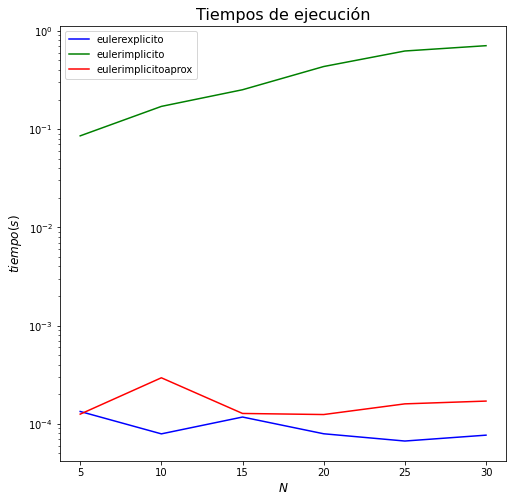

In [8]:
nv = [5+5*i for i in range(6)]
fig,ax = plt.subplots(figsize=(8,8))
colors = "bgr"
for metodo in metodos:
    ax.plot(nv,[tiempos[i][metodo] for i in range(6)],colors[metodos.index(metodo)],label=metodo)
ax.set_yscale("log")
ax.legend(loc='upper left')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$tiempo (s)$',fontsize=12)
ax.set_title('Tiempos de ejecución',fontsize=16)

Y las aproximaciones:

Text(0.5, 1.0, 'Aproximaciones')

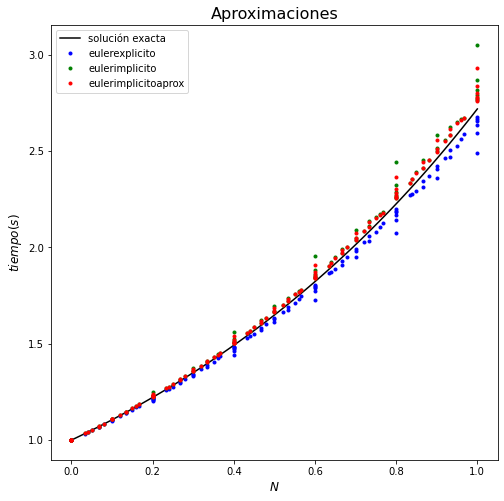

In [9]:
fig,ax = plt.subplots(figsize=(8,8))
xx = np.linspace(a,b,100)
yy = [np.exp(x) for x in xx]
colors = "bgr"
ax.plot(xx,yy,'k',label='solución exacta')
for metodo in metodos:
    ax.plot(x[0],y[0][metodo],colors[metodos.index(metodo)]+'.',label=metodo)
    for i in range(1,6):
        ax.plot(x[i],y[i][metodo],colors[metodos.index(metodo)]+'.')
ax.legend(loc='upper left')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$tiempo (s)$',fontsize=12)
ax.set_title('Aproximaciones',fontsize=16)

Y para que sea más llevadero el comaprar vamos a representar los errores:

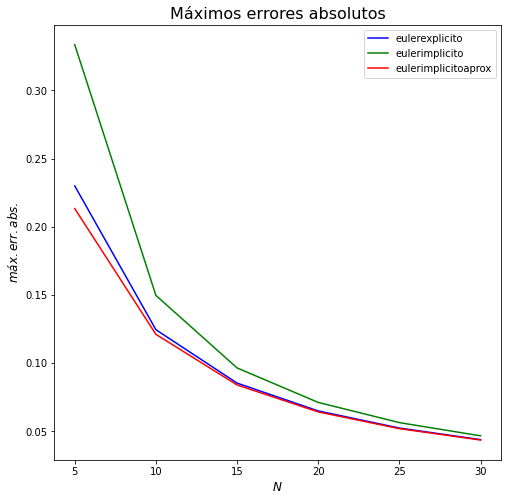

In [10]:
nv = [5+5*i for i in range(6)]
fig,ax = plt.subplots(figsize=(8,8))
colors = "bgr"
for metodo in metodos:
    ax.plot(nv,[abs([np.exp(p) for p in x[i]]-y[i][metodo]).max() for i in range(6)],colors[metodos.index(metodo)],label=metodo)
#ax.set_yscale("log")
ax.legend(loc='upper right')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$máx.err.abs.$',fontsize=12)
ax.set_title('Máximos errores absolutos',fontsize=16);

Es fácil ver que el método implícito no es muy eficiente no en tiempo ni en precisión, y entre el método explícito y las aproximaciones del implícito la diferencia es mínima

**2. A partir de la implementación del algoritmo del método de Euler explícito, realice las modificaciones oportunas para obtener también las implementaciones correspondientes a los métodos de Euler mejorado (o del punto medio), así como del de Euler modificado (o de Heun).**

Vamos a empezar por el mejorado

In [11]:
%%file   eulermejorado.py
import numpy as np
def integrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + h*F(X[n]+h/2,Y[n]+h/2*F(X[n],Y[n])))
    return np.array(X),np.array(Y)

Overwriting eulermejorado.py


Y ahora el modifcado

In [12]:
%%file   eulermodificado.py

import numpy as np
def integrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + h/2*(F(X[n],Y[n])+F(X[n+1],Y[n]+h*F(X[n],Y[n]))))
    return np.array(X),np.array(Y)

Overwriting eulermodificado.py


**3. Realice varios experimentos numéricos, con diferentes valores de $N$, y compare y ratifique los órdenes de convergencia de los diferentes métodos vistos hasta el momento.**

Para empezar vamos a crear un fichero con taylor2

In [13]:
%%file taylor2.py

def integrate(F,x0,y0,xfinal,N):  
    import numpy as np
    import sympy as sp
    
    t, z = sp.symbols('t, z')
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    def F1(t,z):
        return F(t,z)

    def F2(t,z):
        return sp.diff(F(t,z),t) + sp.diff(F(t,z),z)*F1(t,z)
    
    for n in range(N):
        Y.append(Y[n]+h*F1(X[n],Y[n])+h**2/2*F2(t,z).subs({t:X[n],z:Y[n]}))
    return np.array(X),np.array(Y)

Overwriting taylor2.py


Ahora tan sólo seguimos los pasos del ejercicio 1:

In [14]:
metodos = ["eulerexplicito", "eulerimplicito", "eulerimplicitoaprox", "eulermejorado", "eulermodificado", "taylor2"]
x, y, tiempos = comparar_metodos(metodos, lambda i: 5+5*i, 6, f, a, ya, b)

Comparando los métodos ['eulerexplicito', 'eulerimplicito', 'eulerimplicitoaprox', 'eulermejorado', 'eulermodificado', 'taylor2']
Ejecutando 6 iteraciones de valores de N...
 
 Calculando para i=0, N=5
	Finalizado método 'eulerexplicito' con tiempo 0.00013950299999976323
	Finalizado método 'eulerimplicito' con tiempo 0.03522547200000048
	Finalizado método 'eulerimplicitoaprox' con tiempo 0.00011871499999926982
	Finalizado método 'eulermejorado' con tiempo 8.979100000061635e-05
	Finalizado método 'eulermodificado' con tiempo 0.00010908299999989879
	Finalizado método 'taylor2' con tiempo 0.004267243999999337
 Calculando para i=1, N=10
	Finalizado método 'eulerexplicito' con tiempo 0.00031573700000109284
	Finalizado método 'eulerimplicito' con tiempo 0.1617673919999998
	Finalizado método 'eulerimplicitoaprox' con tiempo 0.00012124200000052099
	Finalizado método 'eulermejorado' con tiempo 6.222999999927481e-05
	Finalizado método 'eulermodificado' con tiempo 6.516100000020231e-05
	Finalizad

Text(0.5, 1.0, 'Tiempos de ejecución')

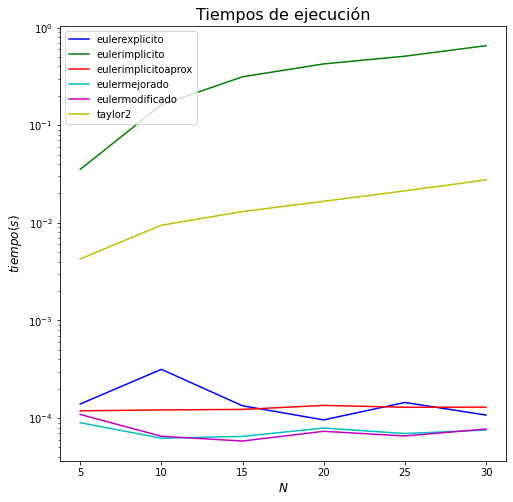

In [15]:
nv = [5+5*i for i in range(6)]
fig,ax = plt.subplots(figsize=(8,8))
colors = "bgrcmy"
for metodo in metodos:
    ax.plot(nv,[tiempos[i][metodo] for i in range(6)],colors[metodos.index(metodo)],label=metodo)
ax.set_yscale("log")
ax.legend(loc='upper left')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$tiempo (s)$',fontsize=12)
ax.set_title('Tiempos de ejecución',fontsize=16)

Text(0.5, 1.0, 'Aproximaciones')

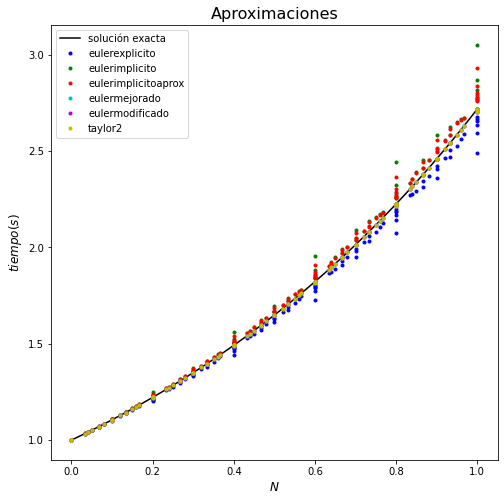

In [16]:
fig,ax = plt.subplots(figsize=(8,8))
xx = np.linspace(a,b,100)
yy = [np.exp(x) for x in xx]
colors = "bgrcmy"
ax.plot(xx,yy,'k',label='solución exacta')
for metodo in metodos:
    ax.plot(x[0],y[0][metodo],colors[metodos.index(metodo)]+'.',label=metodo)
    for i in range(1,6):
        ax.plot(x[i],y[i][metodo],colors[metodos.index(metodo)]+'.')
ax.legend(loc='upper left')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$tiempo (s)$',fontsize=12)
ax.set_title('Aproximaciones',fontsize=16)

Text(0.5, 1.0, 'Máximos errores absolutos')

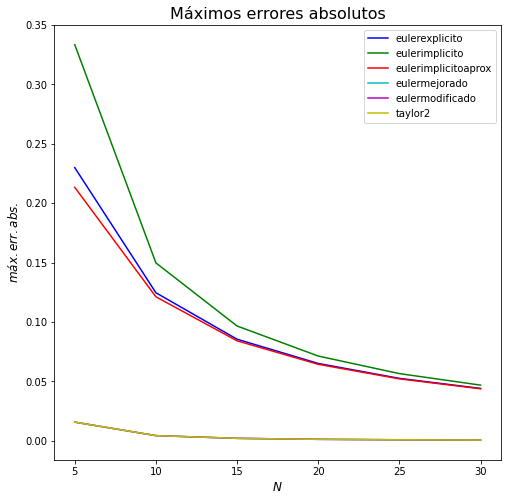

In [17]:
nv = [5+5*i for i in range(6)]
fig,ax = plt.subplots(figsize=(8,8))
colors = "bgrcmy"
for metodo in metodos:
    ax.plot(nv,[abs([np.exp(p) for p in x[i]]-y[i][metodo]).max() for i in range(6)],colors[metodos.index(metodo)],label=metodo)
#ax.set_yscale("log")
ax.legend(loc='upper right')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$máx.err.abs.$',fontsize=12)
ax.set_title('Máximos errores absolutos',fontsize=16)

Vemos como Taylor no es tan rápido como los otros (a excepción del implícito), pero las aproximaciones son notablemente más fiables

**4. A partir de la implementación del algoritmo del método de Taylor de orden $p=2$, realice las modificaciones oportunas para obtener también una posible implementación correspondiente al método de Taylor de orden $p=3$.**

In [18]:
%%file taylor3.py

def integrate(F,x0,y0,xfinal,N):  
    import numpy as np
    import sympy as sp
    
    t, z = sp.symbols('t, z')
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    def F1(t,z):
        return F(t,z)

    def F2(t,z):
        return sp.diff(F(t,z),t) + sp.diff(F(t,z),z)*F1(t,z)
    
    def F3(t,z):
        return sp.diff(F2(t,z),t) + sp.diff(F2(t,z),z)*F1(t,z)
    
    for n in range(N):
        Y.append(Y[n]+h*F1(X[n],Y[n])+h**2/2*F2(t,z).subs({t:X[n],z:Y[n]})+h**3/6*F3(t,z).subs({t:X[n],z:Y[n]}))
    return np.array(X),np.array(Y)

Overwriting taylor3.py


**5. Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional**

Una vez más, empezamos por definir el método

In [19]:
%%file rk4.py

import numpy as np
def integrate(F,x0,y0,xfinal,N):
    
    def RK4(F,xn,yn,h):
        K1 = F(xn,yn)
        K2 = F(xn + h/2, yn + K1*h/2)
        K3 = F(xn + h/2, yn + K2*h/2)
        K4 = F(xn + h  , yn + K3*h)
        return (K1 + 2*K2 + 2*K3 + K4)/6    
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append( Y[n] + h*RK4(F,X[n],Y[n],h) )
    return np.array(X),np.array(Y)

Overwriting rk4.py


Y volvemos a los mismos pasos de siempre

In [20]:
metodos = ["eulerexplicito", "eulerimplicito", "eulerimplicitoaprox", "eulermejorado", "eulermodificado", "taylor2", "taylor3", "rk4"]
x, y, tiempos = comparar_metodos(metodos, lambda i: 5+5*i, 6, f, a, ya, b)

Comparando los métodos ['eulerexplicito', 'eulerimplicito', 'eulerimplicitoaprox', 'eulermejorado', 'eulermodificado', 'taylor2', 'taylor3', 'rk4']
Ejecutando 6 iteraciones de valores de N...
 
 Calculando para i=0, N=5
	Finalizado método 'eulerexplicito' con tiempo 0.0001413880000011858
	Finalizado método 'eulerimplicito' con tiempo 0.037456031999999695
	Finalizado método 'eulerimplicitoaprox' con tiempo 0.00011376299999987793
	Finalizado método 'eulermejorado' con tiempo 0.00010441500000091253
	Finalizado método 'eulermodificado' con tiempo 6.65589999986338e-05
	Finalizado método 'taylor2' con tiempo 0.004301305000000255
	Finalizado método 'taylor3' con tiempo 0.008923918000000697
	Finalizado método 'rk4' con tiempo 0.00012149500000013802
 Calculando para i=1, N=10
	Finalizado método 'eulerexplicito' con tiempo 0.00013174699999929373
	Finalizado método 'eulerimplicito' con tiempo 0.16113897600000016
	Finalizado método 'eulerimplicitoaprox' con tiempo 0.00011867000000087558
	Finalizad

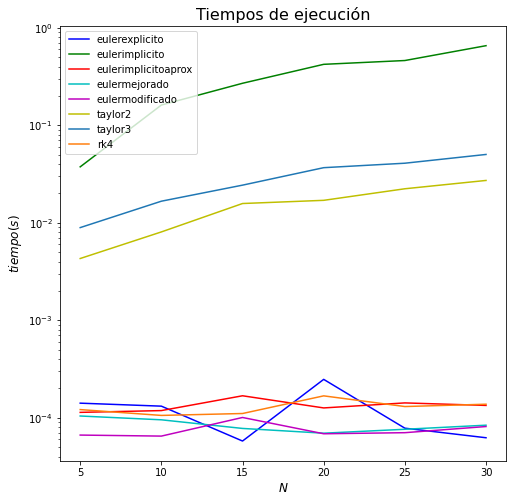

In [21]:
nv = [5+5*i for i in range(6)]
fig,ax = plt.subplots(figsize=(8,8))
colors = ['b','g','r','c','m','y','C0','C1']
for metodo in metodos:
    ax.plot(nv,[tiempos[i][metodo] for i in range(6)],colors[metodos.index(metodo)],label=metodo)
ax.set_yscale("log")
ax.legend(loc='upper left')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$tiempo (s)$',fontsize=12)
ax.set_title('Tiempos de ejecución',fontsize=16);

Text(0.5, 1.0, 'Aproximaciones')

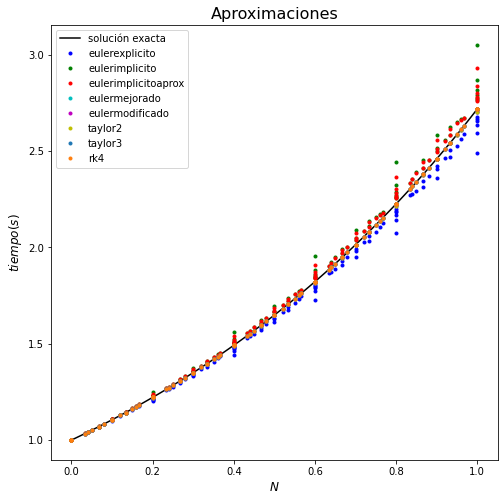

In [22]:
fig,ax = plt.subplots(figsize=(8,8))
xx = np.linspace(a,b,100)
yy = [np.exp(x) for x in xx]
colors = ['b','g','r','c','m','y','C0','C1']
ax.plot(xx,yy,'k',label='solución exacta')
for metodo in metodos:
    ax.plot(x[0],y[0][metodo],colors[metodos.index(metodo)]+'.',label=metodo)
    for i in range(1,6):
        ax.plot(x[i],y[i][metodo],colors[metodos.index(metodo)]+'.')
ax.legend(loc='upper left')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$tiempo (s)$',fontsize=12)
ax.set_title('Aproximaciones',fontsize=16)

Text(0.5, 1.0, 'Máximos errores absolutos')

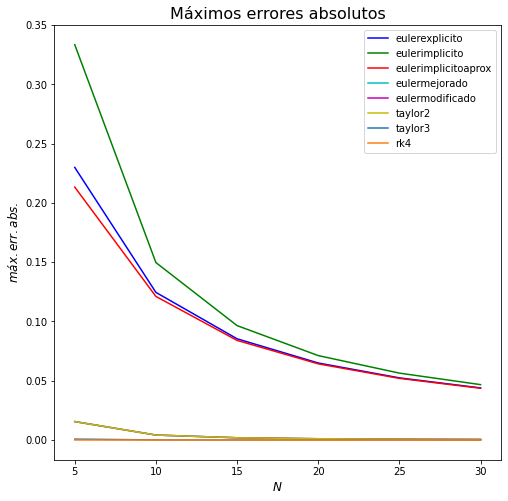

In [23]:
nv = [5+5*i for i in range(6)]
fig,ax = plt.subplots(figsize=(8,8))
colors = ['b','g','r','c','m','y','C0','C1']
for metodo in metodos:
    ax.plot(nv,[abs([np.exp(p) for p in x[i]]-y[i][metodo]).max() for i in range(6)],colors[metodos.index(metodo)],label=metodo)
#ax.set_yscale("log")
ax.legend(loc='upper right')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$máx.err.abs.$',fontsize=12)
ax.set_title('Máximos errores absolutos',fontsize=16)

Se puede observar como RK4 es más rápido que Taylor y aún más preciso

**6. A partir de la implementación del algoritmo del método de Runge-Kutta de 4 evaluaciones, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Runge-Kutta, tanto explícitos como implícitos, a partir del correspondiente arreglo de Butcher.**

Vamos a hacer el método de RK para m evaluaciones

In [24]:
%%file rkexplicito.py

import numpy as np
def integrate(F,butcher,x0,y0,xfinal,N):
    aj,bj,cj=[],[],[]
    m=len(butcher)
    for kj in butcher:
        cj.append(kj[0])
        bj.append(kj[2])
        aj.append(kj[1])
    h=(xfinal-x0)/N

    def RK(F,x,y,h):
        K=[]
        for i in range(m):
            sum=0
            for j in range(i):
                sum+=aj[i][j]*K[j]
            K.append(F(x+cj[i]*h,y+h*sum))
        evalRK=0
        for i in range(m):
            evalRK+=bj[i]*K[i]
        return evalRK

    X=np.linspace(x0,xfinal,N+1)
    Y=[y0]
    for n in range(N):
        Y.append(Y[n]+h*RK(F,X[n],Y[n],h))
    return np.array(X),np.array(Y)

Overwriting rkexplicito.py


Vamos a probarlo para RK2 como se ha visto en clase. Para ello definimos:

In [25]:
butcher=[[0,[0,0],0],[1/2,[1/2,0],1]]

LLamamos ahora al método que acabamos de programar:

In [26]:
module = __import__("rkexplicito")
func = getattr(module, "integrate")

x, y = func(f,butcher,a,ya,b,10)

Ahora podemos pintar las aproximaciones

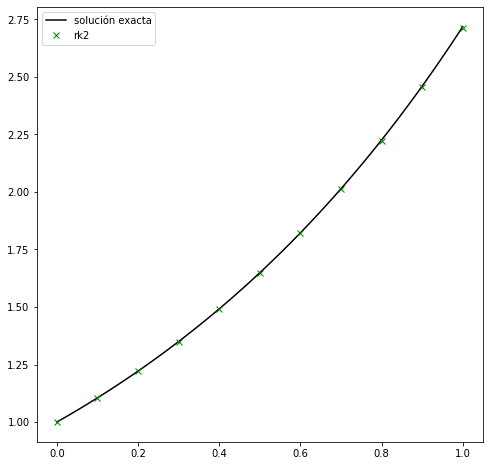

In [27]:
fig,ax = plt.subplots(figsize=(8,8))
xx = np.linspace(a,b,100)
yy = [np.exp(x) for x in xx]
ax.plot(xx,yy,'k',label='solución exacta')
ax.plot(x,y,'x', color="green", label="rk2")
ax.legend(loc='upper left')

Como podemos ver es bastante fiable

**7. A partir de la implementación del algoritmo del método de Adams-Bashforth anterior, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Adams, como Adams-Moulton (AM), Milne-Simpson, Nyström y/o Newton-Cotes.**

In [28]:
%%file adammoulton2.py

def integrate(F,x0,y0,xfinal,N):
    
    import numpy as np
    
    def AM2(F,x0,y0,y1,y2,h):
        return 5/12*F(x0+2*h, y2) + 2/3*F(x0+h, y1) - 1/12*F(x0,y0)
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    y1 = y0 + h*F(x0,y0); Y = [y0,y1]
    for n in range(N-1):
        Y.append(sp.solve(Y[n]+h*AM2(F,X[n],Y[n],Y[n+1],y2,h)-y2,y2)[0])
    return np.array(X),np.array(Y)

Overwriting adammoulton2.py


In [29]:
%%file adammoulton3.py

def integrate(F,x0,y0,xfinal,N):
    
    import numpy as np
    
    def AM3(F,x0,y0,y1,y2,y3,h):
        return 9/24*F(x0+3*h, y3) + 19/24*F(x0+2*h, y2) - 5/24*F(x0+h, y1) + 1/24*F(x0, y0)
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    Y = [y0]
    for i in range(3-1):  # num_pasos - 1
        y1 = y0 + h*F(x0,y0)
        Y.append(y1)
        y0 = y1
        
    for n in range(N-1):
        Y.append(sp.solve(Y[n]+h*AM3(F,X[n],Y[n],Y[n+1],Y[n+2],y3,h)-y3,y2)[0])
    return np.array(X),np.array(Y)

Overwriting adammoulton3.py


**8. Intente la implementación del algoritmo de tipo Predictor-Corrector anterior, o cualquier otro adecuado, eligiendo convenientemente los otros métodos necesarios para proporcionar los valores previos necesarios.**

Vamos a utilizar como predictor y corrector:

$P:y^{(0)}_{n+3} = y_{n+2} + h\left(\frac{23}{12}f_{n+2} - \frac{4}{3}f_{n+1} + \frac{5}{12}f_n\right)$

$C:y_{n+4}=y_{n+3} + h \left(\frac{3}{8}f(t_{n+4},y_{n+4}^{(0)}) + \frac{19}{24}f_{n+3} - \frac{5}{24}f_{n+2} + \frac{1}{24}f_{n+1}\right)$

Basados en Adams-Bashforth de 3 pasos y Adam-Bashforth-Moulton de 4 pasos respectivamente.

In [30]:
%%file prediccorrec.py

def integrate(F,x0,y0,xfinal,N):
    import numpy as np
    import eulerexplicito
    
    h = (xfinal-x0)/N
    X = np.linspace(x0,xfinal,N+1)
    Y = np.zeros(N+1)
    
    _, Y[0:3] = eulerexplicito.integrate(F,x0,y0,x0+2*h,2) #vale cualquier otro método de un paso anterior
    
    K1 = F(X[1],Y[1])
    K2 = F(X[0],Y[0])
    for i in range(2,N):
        K3 = K2
        K2 = K1
        K1 = F(X[i],Y[i])
        # predictor
        Y[i+1] = Y[i] + h*(23*K1-16*K2+5*K3)/12
        K0 = F(X[i+1],Y[i+1])
        # corrector
        Y[i+1] = Y[i] + h*(9*K0+19*K1-5*K2+K3)/24
    return np.array(X),np.array(Y)

Overwriting prediccorrec.py


Vamos a probarlo como en el ejercicio 6

In [31]:
module = __import__("prediccorrec")
func = getattr(module, "integrate")

x, y = func(f,a,ya,b,10)

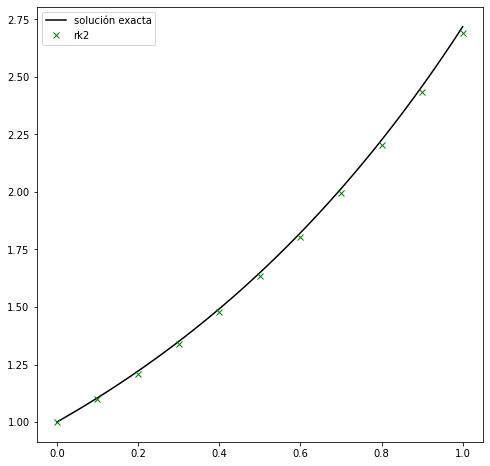

In [32]:
fig,ax = plt.subplots(figsize=(8,8))
xx = np.linspace(a,b,100)
yy = [np.exp(x) for x in xx]
ax.plot(xx,yy,'k',label='solución exacta')
ax.plot(x,y,'x', color="green", label="rk2")
ax.legend(loc='upper left')